In [1]:
import yfinance as yf

In [2]:
SET50_TICKER = yf.Ticker("^SET.BK")
SET50 = SET50_TICKER.history(period="3Y")
SET50.reset_index(inplace=True)
SET50["Date"] = SET50["Date"].dt.strftime("%Y-%m-%d")
SET50["id"] = "SET50"
SET50.sort_values(by="Date", inplace=True)
SET50 = SET50[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_set50 = SET50[:-30]
test_set50 = SET50[-30:]

In [3]:
SP500_TICKER = yf.Ticker("^GSPC")
SP500 = SP500_TICKER.history(period="3Y")
SP500.reset_index(inplace=True)
SP500["Date"] = SP500["Date"].dt.strftime("%Y-%m-%d")
SP500["id"] = "S&P500"
SP500.sort_values(by="Date", inplace=True)
SP500 = SP500[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_sp500 = SP500[:-30]
test_sp500 = SP500[-30:]

In [4]:
CSI300_TICKER = yf.Ticker("000300.SS")
CSI300 = CSI300_TICKER.history(period="3Y")
CSI300.reset_index(inplace=True)
CSI300["Date"] = CSI300["Date"].dt.strftime("%Y-%m-%d")
CSI300["id"] = "CSI300"
CSI300.sort_values(by="Date", inplace=True)
CSI300 = CSI300[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_csi300 = CSI300[:-30]
test_csi300 = CSI300[-30:]

In [5]:
NI225_TICKER = yf.Ticker("^N225")
NI225 = NI225_TICKER.history(period="3Y")
NI225.reset_index(inplace=True)
NI225["Date"] = NI225["Date"].dt.strftime("%Y-%m-%d")
NI225["id"] = "NI225"
NI225.sort_values(by="Date", inplace=True)
NI225 = NI225[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_ni225 = NI225[:-30]
test_ni225 = NI225[-30:]

In [6]:
HSI_TICKER = yf.Ticker("^HSI")
HSI = HSI_TICKER.history(period="3Y")
HSI.reset_index(inplace=True)
HSI["Date"] = HSI["Date"].dt.strftime("%Y-%m-%d")
HSI["id"] = "HSI"
HSI.sort_values(by="Date", inplace=True)
HSI = HSI[["id", "Date", "Open", "High", "Low", "Close", "Volume"]]
train_hsi = HSI[:-30]
test_hsi = HSI[-30:]


In [7]:
import pandas as pd

train = pd.concat([train_set50, train_sp500, train_csi300, train_ni225, train_hsi])
full_train = pd.concat([SET50, SP500, CSI300, NI225, HSI])

test = pd.concat([test_set50, test_sp500, test_csi300, test_ni225, test_hsi])

In [8]:
from autogluon.timeseries import TimeSeriesDataFrame

train_data = TimeSeriesDataFrame(
    train,
    id_column="id",
    timestamp_column="Date",
)

full_train_data = TimeSeriesDataFrame(
    full_train,
    id_column="id",
    timestamp_column="Date",
)

In [9]:
# from autogluon.timeseries import TimeSeriesPredictor
# 
# predictor = TimeSeriesPredictor(
#     prediction_length=45,
#     path="Model",
#     target="Open",
#     freq="D",
#     eval_metric="MASE",
# )
# 
# predictor.fit(
#     train_data,
#     presets="best_quality",
# )

In [10]:
from autogluon.timeseries import TimeSeriesPredictor

predictor = TimeSeriesPredictor.load("Model")

In [11]:
test_data = TimeSeriesDataFrame(
    test,
    id_column="id",
    timestamp_column="Date",
)

In [12]:
test_data

Open          High           Low         Close  \
item_id timestamp                                                            
SET50   2024-02-07   1400.199951   1402.650024   1394.020020   1400.020020   
        2024-02-08   1399.400024   1403.800049   1388.109985   1388.599976   
        2024-02-09   1389.920044   1391.750000   1385.020020   1388.369995   
        2024-02-12   1389.540039   1392.469971   1386.280029   1389.300049   
        2024-02-13   1391.699951   1397.800049   1390.400024   1391.729980   
...                          ...           ...           ...           ...   
HSI     2024-03-14  17120.539062  17209.820312  16878.109375  16961.660156   
        2024-03-15  16758.359375  16821.130859  16550.419922  16720.890625   
        2024-03-18  16690.259766  16801.640625  16641.580078  16737.119141   
        2024-03-19  16628.070312  16682.539062  16492.089844  16529.480469   
        2024-03-20  16559.009766  16654.080078  16430.119141  16543.070312   

                        Volume  
item_id timestamp               
SET50   2024-02-07     5029800  
        2024-02-08     4794100  
        2024-02-09     2843000  
        2024-02-12     3437200  
        2024-02-13     3593800  
...                        ...  
HSI     2024-03-14  2699096400  
        2024-03-15  3776694200  
        2024-03-18  2241776800  
        2024-03-19  2433582900  
        2024-03-20           0  

[150 rows x 5 columns]

In [13]:
predictions = predictor.predict(train_data)

data with frequency 'None' has been resampled to frequency 'D'.
data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.


In [14]:
predictions

mean           0.1           0.2           0.3  \
item_id timestamp                                                            
SET50   2024-02-07   1391.902469   1377.236066   1382.334778   1385.959211   
        2024-02-08   1390.735085   1371.175970   1377.972176   1382.806043   
        2024-02-09   1389.260496   1366.738275   1374.554437   1380.121488   
        2024-02-10   1392.203510   1367.579992   1376.121961   1382.208699   
        2024-02-11   1390.495834   1363.320592   1372.745487   1379.463206   
...                          ...           ...           ...           ...   
HSI     2024-03-17  15373.393569  13492.437574  14144.075412  14609.110032   
        2024-03-18  15355.541055  13464.015628  14119.345916  14586.989197   
        2024-03-19  15369.679480  13471.303512  14129.047118  14598.379574   
        2024-03-20  15374.518975  13455.688317  14120.510768  14594.901179   
        2024-03-21  15390.245404  13456.678745  14126.360999  14604.418953   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
SET50   2024-02-07   1389.035433   1391.902469   1394.769505   1397.845728   
        2024-02-08   1386.909884   1390.735085   1394.560347   1398.664126   
        2024-02-09   1384.850890   1389.260496   1393.670133   1398.399503   
        2024-02-10   1387.380759   1392.203510   1397.026200   1402.198259   
        2024-02-11   1385.172149   1390.495834   1395.819550   1401.528553   
...                          ...           ...           ...           ...   
HSI     2024-03-17  15004.547143  15373.393569  15742.240483  16137.677593   
        2024-03-18  14984.636765  15355.541055  15726.446322  16124.092425   
        2024-03-19  14997.450992  15369.679480  15741.908455  16140.979385   
        2024-03-20  14998.275795  15374.518975  15750.762643  16154.137259   
        2024-03-21  15010.989645  15390.245404  15769.501163  16176.071855   

                             0.8           0.9  
item_id timestamp                               
SET50   2024-02-07   1401.470130   1406.568873  
        2024-02-08   1403.498024   1410.294260  
        2024-02-09   1403.966646   1411.782748  
        2024-02-10   1408.284997   1416.827028  
        2024-02-11   1408.246242   1417.671107  
...                          ...           ...  
HSI     2024-03-17  16602.711726  17254.350051  
        2024-03-18  16591.736194  17247.066482  
        2024-03-19  16610.311841  17268.055935  
        2024-03-20  16628.528158  17293.350121  
        2024-03-21  16654.129808  17323.811574  

[225 rows x 10 columns]

In [15]:
full_predictions = predictor.predict(full_train_data)

data with frequency 'None' has been resampled to frequency 'D'.
data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.


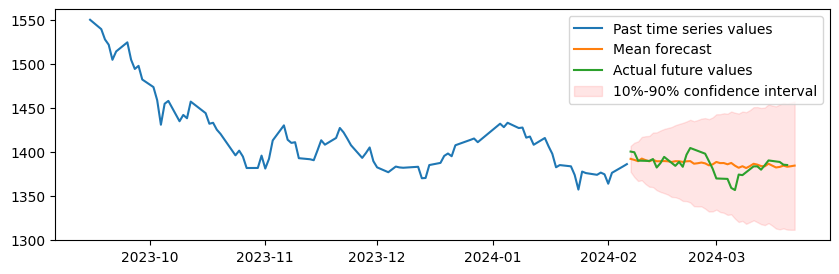

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

item_id = "SET50"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[600:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

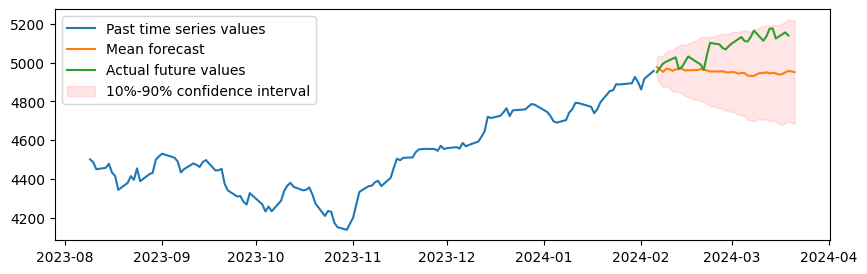

In [24]:
plt.figure(figsize=(10, 3))

item_id = "S&P500"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[600:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

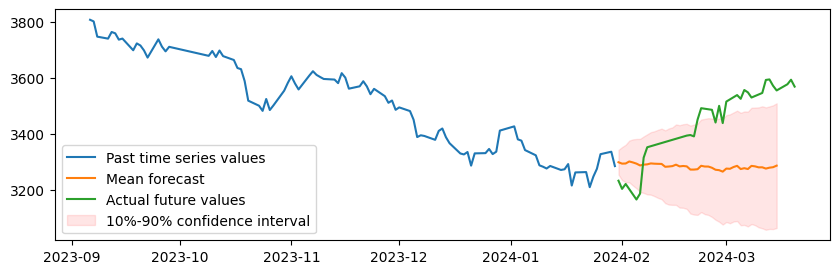

In [25]:
plt.figure(figsize=(10, 3))

item_id = "CSI300"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[600:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

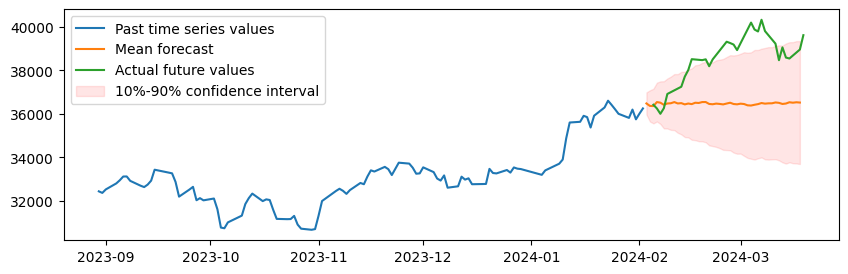

In [27]:
plt.figure(figsize=(10, 3))

item_id = "NI225"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[600:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [ ]:
plt.figure(figsize=(10, 3))

item_id = "HSI"
y_past = train_data.loc[item_id]["Open"]
y_pred = predictions.loc[item_id]

plt.plot(y_past[600:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")
plt.plot(test_data.loc[item_id]["Open"], label="Actual future values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [ ]:
predictor2 = TimeSeriesPredictor(
    prediction_length=45,
    path="Model2",
    target="Open",
    freq="D",
    eval_metric="MASE",
)

predictor2.fit(
    full_train_data,
    presets="best_quality",
)

In [ ]:
full_predictions2 = predictor2.predict(full_train_data)

In [ ]:
predictor.fit_summary()

In [ ]:
predictor.refit_full()

In [ ]:
plt.figure(figsize=(10, 3))

item_id = "SET50"
y_past = full_train_data.loc[item_id]["Open"]
y_pred = full_predictions2.loc[item_id]

plt.plot(y_past[500:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

In [ ]:
plt.figure(figsize=(10, 3))

item_id = "S&P500"
y_past = full_train_data.loc[item_id]["Open"]
y_pred = full_predictions2.loc[item_id]

plt.plot(y_past[500:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

In [ ]:
plt.figure(figsize=(10, 3))

item_id = "CSI300"
y_past = full_train_data.loc[item_id]["Open"]
y_pred = full_predictions2.loc[item_id]

plt.plot(y_past[500:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

In [ ]:
plt.figure(figsize=(10, 3))

item_id = "NI225"
y_past = full_train_data.loc[item_id]["Open"]
y_pred = full_predictions2.loc[item_id]

plt.plot(y_past[500:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

In [ ]:
plt.figure(figsize=(10, 3))

item_id = "HSI"
y_past = full_train_data.loc[item_id]["Open"]
y_pred = full_predictions2.loc[item_id]

plt.plot(y_past[500:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()